In [1]:
import glob

import matplotlib.pyplot as plt
import numpy as np

from PIL import Image

In [2]:
def initialize_lattice(N):
    return np.random.choice([-1, 1], size=(N, N))

In [3]:
def bc(lattice, x):
    # assumes square lattice
    if x >= lattice.shape[0]:
        return 0
    elif x < 0:
        return lattice.shape[0] - 1
    else:
        return x

In [19]:
def plot_lattice(lattice, i, moves, save=False):
    fig, ax = plt.subplots(figsize=(6, 6), dpi=300)
    ax.imshow(lattice, cmap='bwr', origin='lower')
    ax.set_title(f'$t = {i}$')
    ax.tick_params(axis='both', which='both', length=0)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    fig.tight_layout()
    if save:
        fig.savefig(f'figs/2d/T-{str(T).replace(".", "_")}/t_{str(i).rjust(len(str(moves)), "0")}.jpg', dpi=150)
        
    return fig

In [26]:
def simulate(lattice, moves, T, J, animate=False, ani_interval=None):
    if animate:
        fig = plot_lattice(lattice, 0, moves, save=True)  # initial lattice
        plt.close(fig=fig)
    N, M = lattice.shape
    for i in np.arange(1, moves + 1):
        _N, _M = np.random.randint(N), np.random.randint(M)
        _state = lattice[_N, _M]
        _energy = -J * _state * (lattice[bc(lattice, _N+1), _M] + lattice[bc(lattice, _N-1), _M] + lattice[_N, bc(lattice, _M+1)] + lattice[_N, bc(lattice, _M-1)])
        energy_new = J * _state * (lattice[bc(lattice, _N+1), _M] + lattice[bc(lattice, _N-1), _M] + lattice[_N, bc(lattice, _M+1)] + lattice[_N, bc(lattice, _M-1)])
        if energy_new < _energy:
            lattice[_N, _M] = -1 * _state
        elif np.random.random() < np.exp(-energy_new / T):
            lattice[_N, _M] = -1 * _state

        if animate:
            if i % ani_interval == 0:
                fig = plot_lattice(lattice, i, moves, save=True)
                plt.close(fig=fig)

    plot_lattice(lattice, moves, moves, save=False)

    return lattice

In [ ]:
N = 1000
fig = plot_lattice(initialize_lattice(N), 0, 0, save=False)

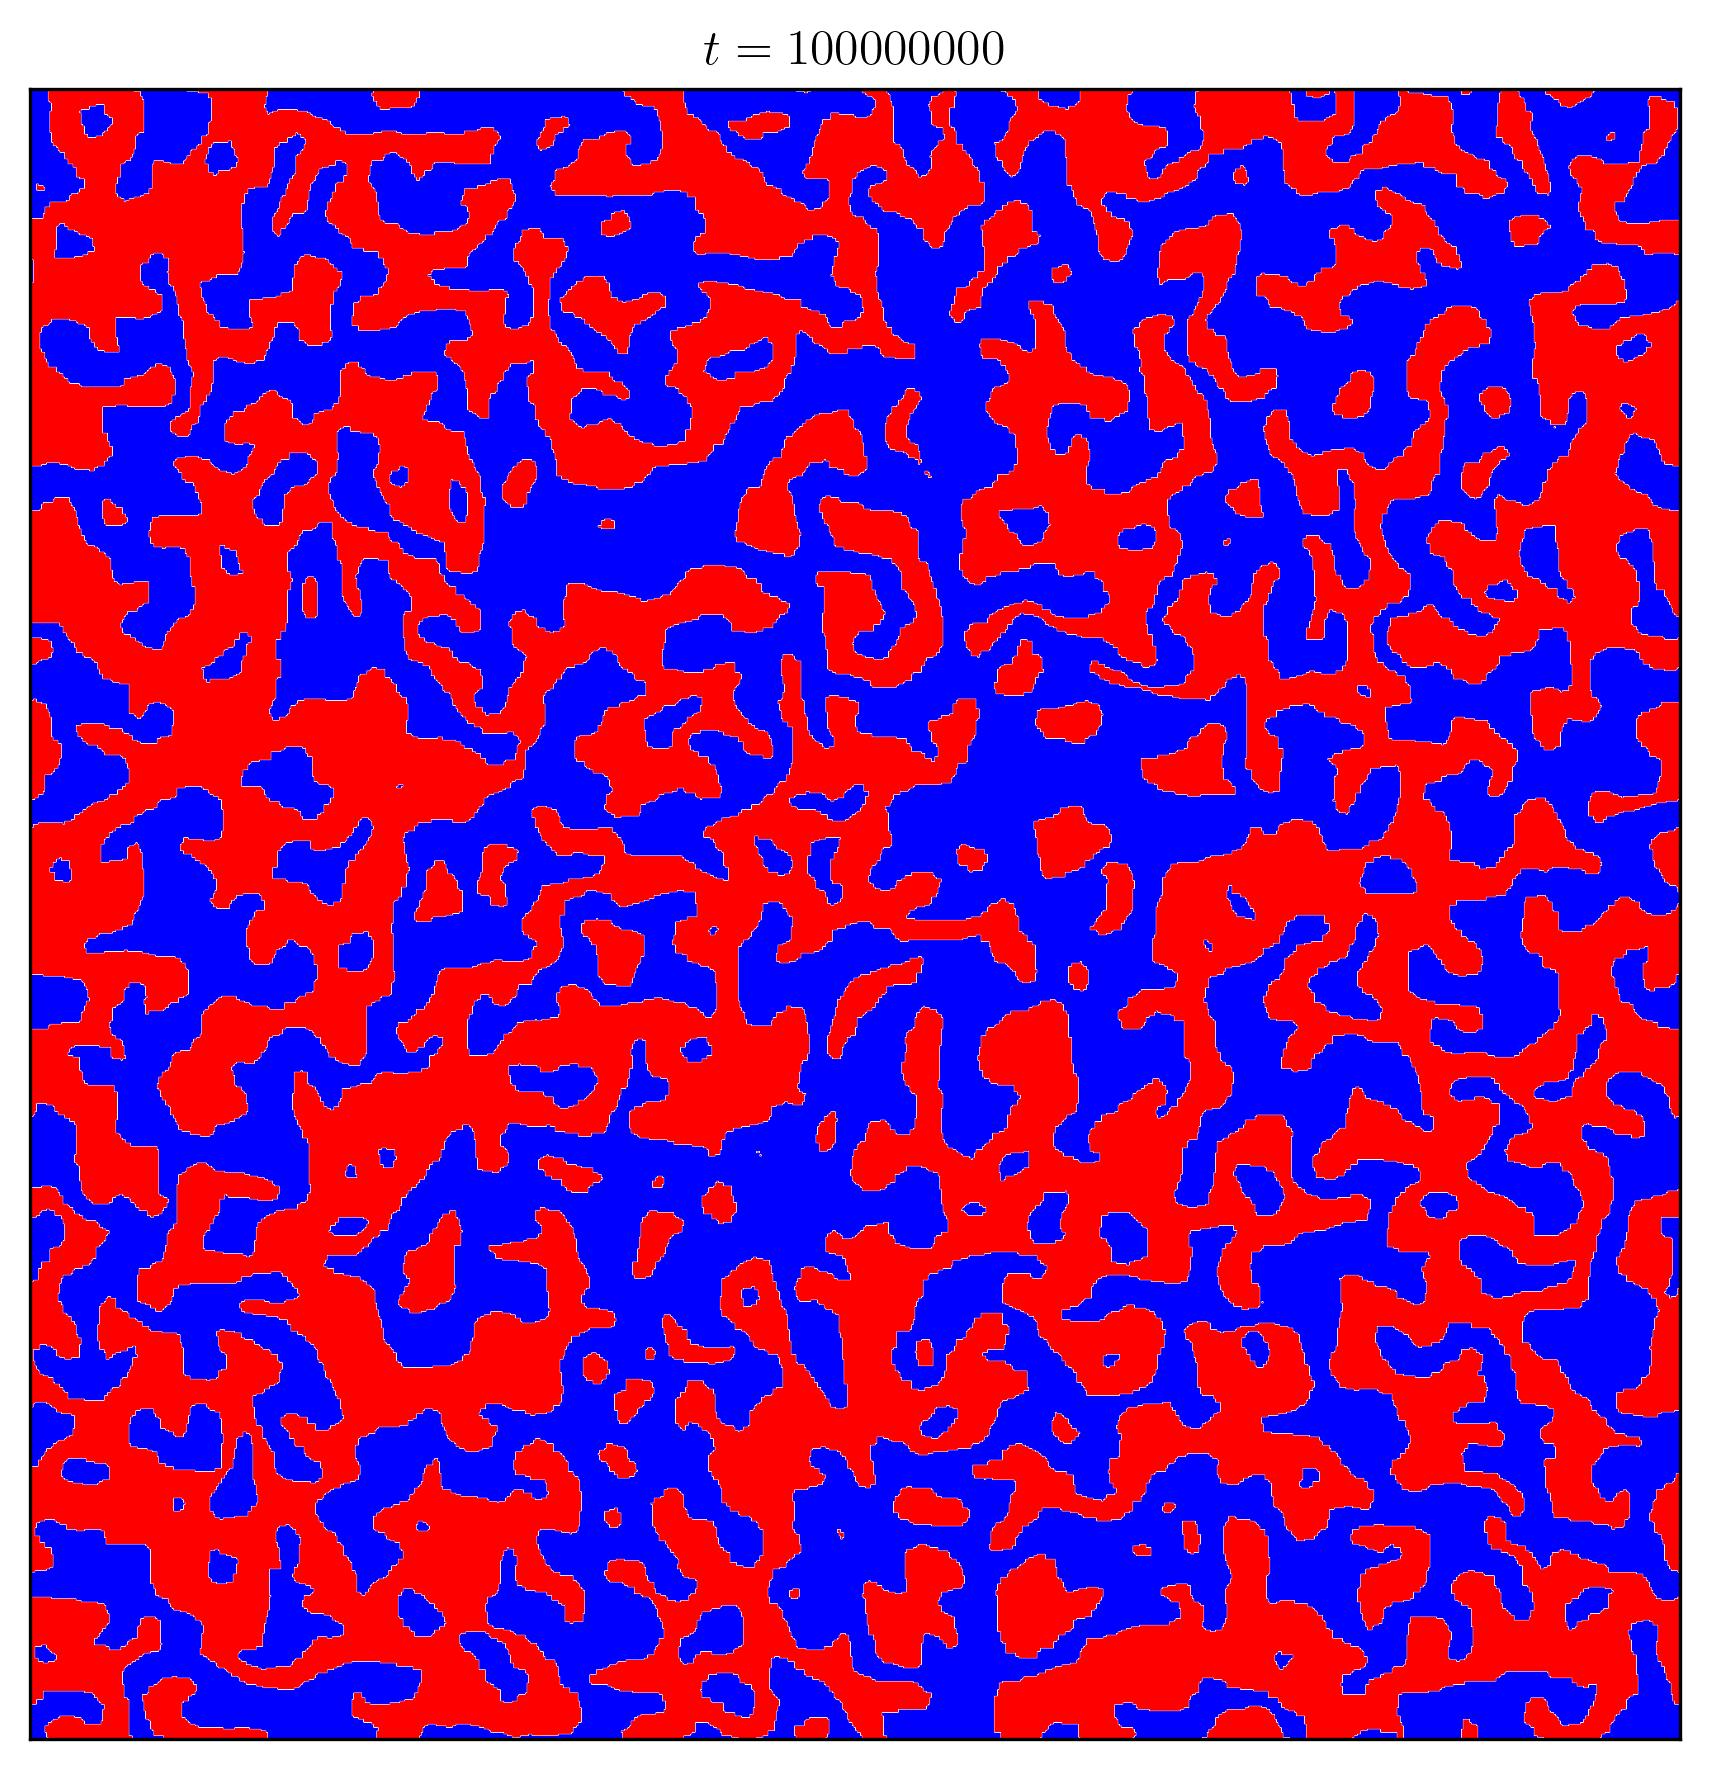

In [29]:
N_moves = 10 ** 8
T = 0.001
J = 2

lattice = simulate(initialize_lattice(N), N_moves, T, J, animate=False, ani_interval=N_moves/100)

In [58]:
# generate gif from snapshots
path_in = 'figs/ising-model/T-0_01/t_*.jpg'
path_out = 'figs/ising-model/T-0_01/simulation.gif'

imgs = (Image.open(f) for f in sorted(glob.glob(path_in)))
img = next(imgs)
img.save(
    fp=path_out, format='GIF', append_images=imgs,
    save_all=True, duration=50, loop=0,
)